In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data)


In [25]:
id = df[df["gender"] == "Other"].index
df = df.drop(id)
donnees_dupliquees = df.duplicated().any()
print(donnees_dupliquees)

False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


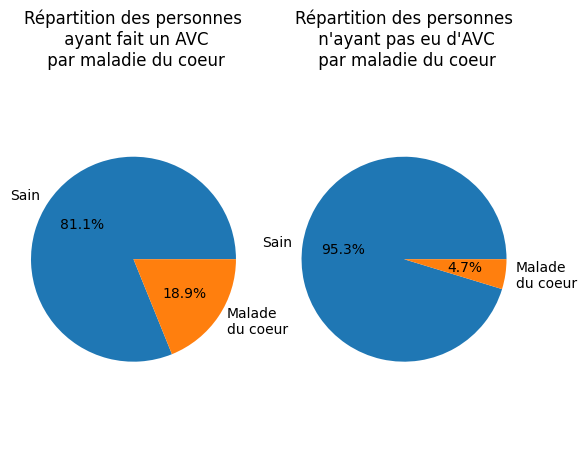

In [5]:
heart_diseases_stroke = df[df["stroke"] == 1]['heart_disease'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(heart_diseases_stroke, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0)
plt.title('Répartition des personnes\n ayant fait un AVC\n par maladie du coeur')
plt.axis('equal') 

heart_diseases_healthy = df[df["stroke"] == 0]['heart_disease'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(heart_diseases_healthy, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0)
plt.title("Répartition des personnes\n n'ayant pas eu d'AVC\n par maladie du coeur")
plt.axis('equal') 

plt.show()

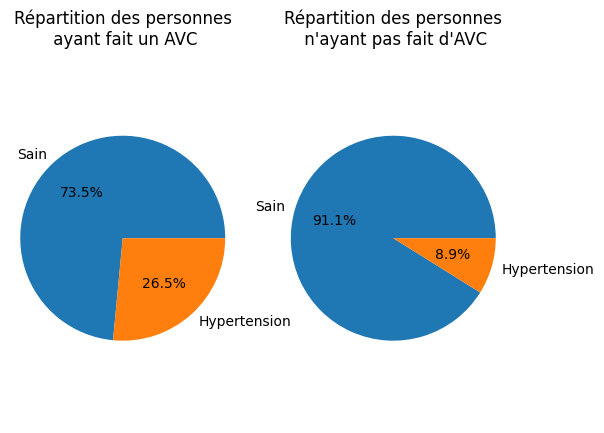

In [6]:
hypertension_stroke = df[df["stroke"] == 1]['hypertension'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(hypertension_stroke, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0)
plt.title("Répartition des personnes\n ayant fait un AVC")
plt.axis('equal') 

hypertension_healthy = df[df["stroke"] == 0]['hypertension'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(hypertension_healthy, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0)
plt.title("Répartition des personnes\n n'ayant pas fait d'AVC")
plt.axis('equal') 

plt.show()

In [7]:
data = df[df["stroke"] == 1].value_counts()
print(data)

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
210    Male    81.0  0             0              Yes           Self-employed  Rural           91.54              31.4  never smoked     1         1
37060  Female  81.0  0             0              Yes           Private        Rural           80.13              23.4  never smoked     1         1
48405  Male    80.0  0             1              Yes           Private        Urban           68.53              24.2  smokes           1         1
49130  Male    74.0  0             0              Yes           Private        Urban           98.55              25.6  Unknown          1         1
49669  Female  14.0  0             0              No            children       Rural           57.93              30.9  Unknown          1         1
                                                                                                               

In [8]:
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [9]:
from sklearn.calibration import LabelEncoder
import plotly.express as px

le = LabelEncoder()
df_par = df.copy()
for col in df.select_dtypes(exclude=['int64', 'float', 'float64', 'int']).columns:
    df_par[col] = le.fit_transform(df_par[col])

fig = px.parallel_coordinates(df_par.drop(columns=['id']), color="stroke", title='Visualization of Multivariate Data')

fig.show()

In [33]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['bmi'])
df_new = df_copy.drop(columns=['id','gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
print(df_new), 
fig = px.parallel_coordinates(df_new, color="stroke", title='Visualization of Multivariate Data', color_continuous_scale=["#FFD8BE","#9381FF"])
fig.show()

       age  avg_glucose_level   bmi  stroke
0     67.0             228.69  36.6       1
2     80.0             105.92  32.5       1
3     49.0             171.23  34.4       1
4     79.0             174.12  24.0       1
5     81.0             186.21  29.0       1
...    ...                ...   ...     ...
5104  13.0             103.08  18.6       0
5106  81.0             125.20  40.0       0
5107  35.0              82.99  30.6       0
5108  51.0             166.29  25.6       0
5109  44.0              85.28  26.2       0

[4908 rows x 4 columns]
